In [1]:
print('notebook for execution')

notebook for execution


In [23]:
!ls

activate-env.sh		 clean_stats.csv     pert_estimated	   stats
asr_num_size.csv	 config.json	     perturbed_image1.png  stats.csv
attacks			 contam		     perturbed_image2.png  stats.py
attacks_crafting.py	 data		     perturbed_image.png   training_logs
Backdoor_patterns.ipynb  detection	     readme.md		   train.py
checkpoint_contam	 execute.ipynb	     requirements.txt
chessdoor_pattern.png	 original_image.png  src


In [2]:
%cd ..
%cd content/drive/MyDrive/C597_ADL/detection/

/
/content/drive/MyDrive/C597_ADL/detection


In [22]:
!ls

activate-env.sh		 clean_stats.csv     pert_estimated	   stats
asr_num_size.csv	 config.json	     perturbed_image1.png  stats.csv
attacks			 contam		     perturbed_image2.png  stats.py
attacks_crafting.py	 data		     perturbed_image.png   training_logs
Backdoor_patterns.ipynb  detection	     readme.md		   train.py
checkpoint_contam	 execute.ipynb	     requirements.txt
chessdoor_pattern.png	 original_image.png  src


In [ ]:
!git clone https://github.com/salikadave/BackdoorAttackExperiments.git

Cloning into 'BackdoorAttackExperiments'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 93 (delta 31), reused 87 (delta 27), pack-reused 0
Receiving objects: 100% (93/93), 4.68 MiB | 11.83 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [4]:
%cd BackdoorAttackExperiments/

/content/drive/MyDrive/C597_ADL/detection/BackdoorAttackExperiments


In [5]:
!git branch -a

* detection
  main
  remotes/origin/HEAD -> origin/main
  remotes/origin/detection
  remotes/origin/main


In [6]:
!git checkout detection

Already on 'detection'
Your branch is up to date with 'origin/detection'.


In [ ]:
!pip install -r requirements.txt # restart not required

In [8]:
!git pull origin detection

From https://github.com/salikadave/BackdoorAttackExperiments
 * branch            detection  -> FETCH_HEAD
Already up to date.


In [33]:
!git restore detection/pert_estimation_AD.py
!git restore detection/detection_inference_AD.py

In [89]:
!python detection/pert_estimation_AD.py

/content/drive/MyDrive/C597_ADL/detection/BackdoorAttackExperiments
==> Preparing data..
Files already downloaded and verified
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
--- 80.78492593765259 seconds ---


In [91]:
!python detection/detection_inference_AD.py

Backdoor attack detected!
Detected (s, t) pair: (8, 4)


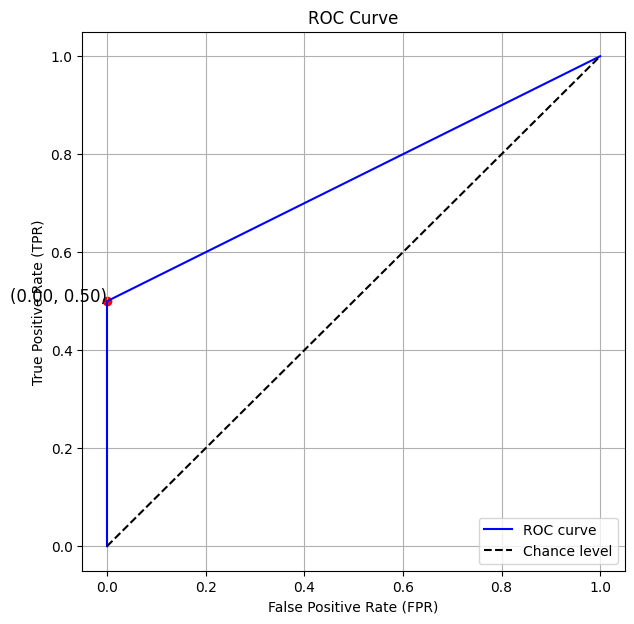

0.25


<Figure size 640x480 with 0 Axes>

In [68]:
import matplotlib.pyplot as plt

def plot_roc(TP, FP, TN, FN):
    # Calculate the True Positive Rate (TPR) and False Positive Rate (FPR)
    TPR = TP / (TP + FN) if TP + FN else 0
    FPR = FP / (FP + TN) if FP + TN else 0

    print()

    # Plotting the ROC curve
    plt.figure(figsize=(7, 7))
    plt.plot([0, FPR, 1], [0, TPR, 1], 'b', label='ROC curve')
    plt.scatter([FPR], [TPR], color='red')  # Mark the operational point
    plt.text(FPR, TPR, f'({FPR:.2f}, {TPR:.2f})', fontsize=12, ha='right')

    # Plot baseline (chance level)
    plt.plot([0, 1], [0, 1], 'k--', label='Chance level')

    # Adding labels and title
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    plt.savefig('roc1.png')

    print((1- (FPR + TPR))/2)
# Example usage
plot_roc(TP=4, FP=0, TN=1, FN=4) # ROC Curve for original sample values

# plot_roc(TP=10, FP=0, TN=1, FN=0) # ROC Curve for varying number of classes (NC)

In [ ]:
!pip install scikit-learn

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# sample_count = 9
# 0 - poisoned classifier
# 1 - clean classifier

# 0 --> no confidence
# 1 --> high confidence

# y_true = [1, 0, 0, 0, 0, 0, 0, 0, 0]
# y_pred = [1, 1, 1, 1, 1, 0, 0, 0, 0]

y_true = [1, 0, 0, 0, 0]
y_pred = [1, 1, 1, 1, 1]

# Calculate the ROC curve points
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)  # Calculate AUC

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

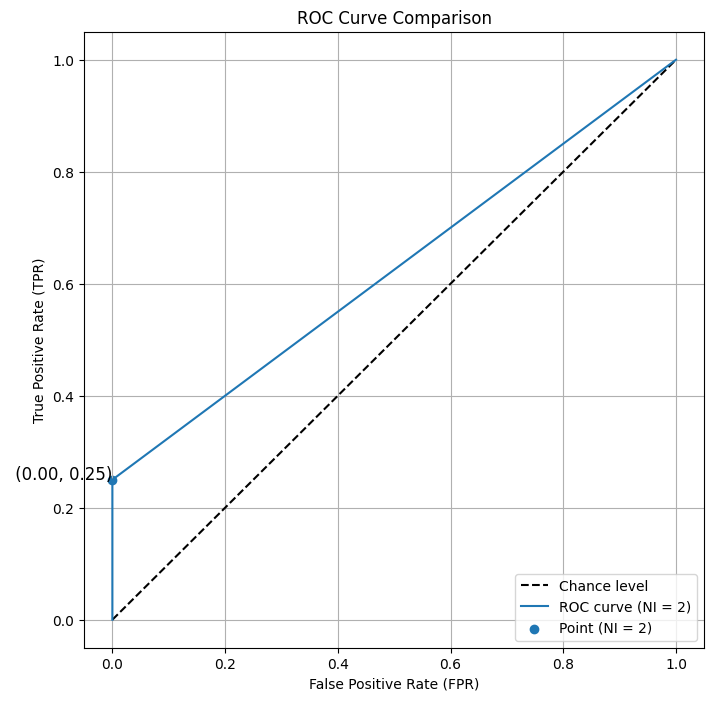

<Figure size 640x480 with 0 Axes>

In [92]:
import matplotlib.pyplot as plt

def plot_multiple_roc(tp_list, fp_list, tn_list, fn_list, labels):
    plt.figure(figsize=(8, 8))

    # Plot the baseline (chance level)
    plt.plot([0, 1], [0, 1], 'k--', label='Chance level')

    for TP, FP, TN, FN, label in zip(tp_list, fp_list, tn_list, fn_list, labels):
        # Calculate the True Positive Rate (TPR) and False Positive Rate (FPR)
        TPR = TP / (TP + FN) if TP + FN else 0
        FPR = FP / (FP + TN) if FP + TN else 0

        # Plot each ROC curve
        plt.plot([0, FPR, 1], [0, TPR, 1], label=f'ROC curve ({label})')
        plt.scatter([FPR], [TPR], label=f'Point ({label})')  # Mark the operational point
        plt.text(FPR, TPR, f' ({FPR:.2f}, {TPR:.2f})', fontsize=12, ha='right')

    # Adding labels and title
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve Comparison')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    plt.savefig('roc2.png')

# Example usage
plot_multiple_roc(
    tp_list=[1, 0],
    fp_list=[0, 0],
    tn_list=[0, 1],
    fn_list=[3, 5],
    labels=['NI = 2', 'NI = 3']
)

In [ ]:
!python train.py

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified
==> Building model..

Epoch: 0
Learning rate:  0.001
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Train ACC: 45.964
Test ACC: 59.590
Saving..
Attack success rate: 4.100

Epoch: 1
Learning rate:  0.001
Train ACC: 64.238
Test ACC: 69.080
Saving..
Attack success rate: 0.000

Epoch: 2
Learning rate:  0.001
Train ACC: 73.614
Test ACC: 73.550
Saving..
Attack success rate: 0.600

Epoch: 3
Learning rate:  0.001
Train ACC: 78.256
Test ACC: 78.210
Saving..
Attack success rate: 0.100

Epoch: 4
Learning rate:  0.001
Train ACC: 81.292
Test ACC: 81.350
Saving..
Attack success rate: 0.400

Epoch: 5
Learning rate:  0.001
Train ACC: 83.460
Test ACC: 84.440
Saving..
Attack success rate: 74.200

Epoch: 6
Learning rate:  0.001